<a href="https://colab.research.google.com/github/tejaswini8213/ML-Notebooks/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical #convert class labels into one-hot encoded vectors.
from keras.preprocessing.image import ImageDataGenerator #used for data augmentation and preprocessing of images
from tensorflow.keras import models
from keras.layers import Dense,MaxPool2D,Conv2D,BatchNormalization,Flatten,Dropout #common operations for cnn


In [2]:
!nvidia-smi

Wed Sep  6 17:25:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Loading the dataset: (MNIST- 60K training and 10k testing, (28x28))

In [3]:
(x_train, y_train),(x_test,y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Data analysis:

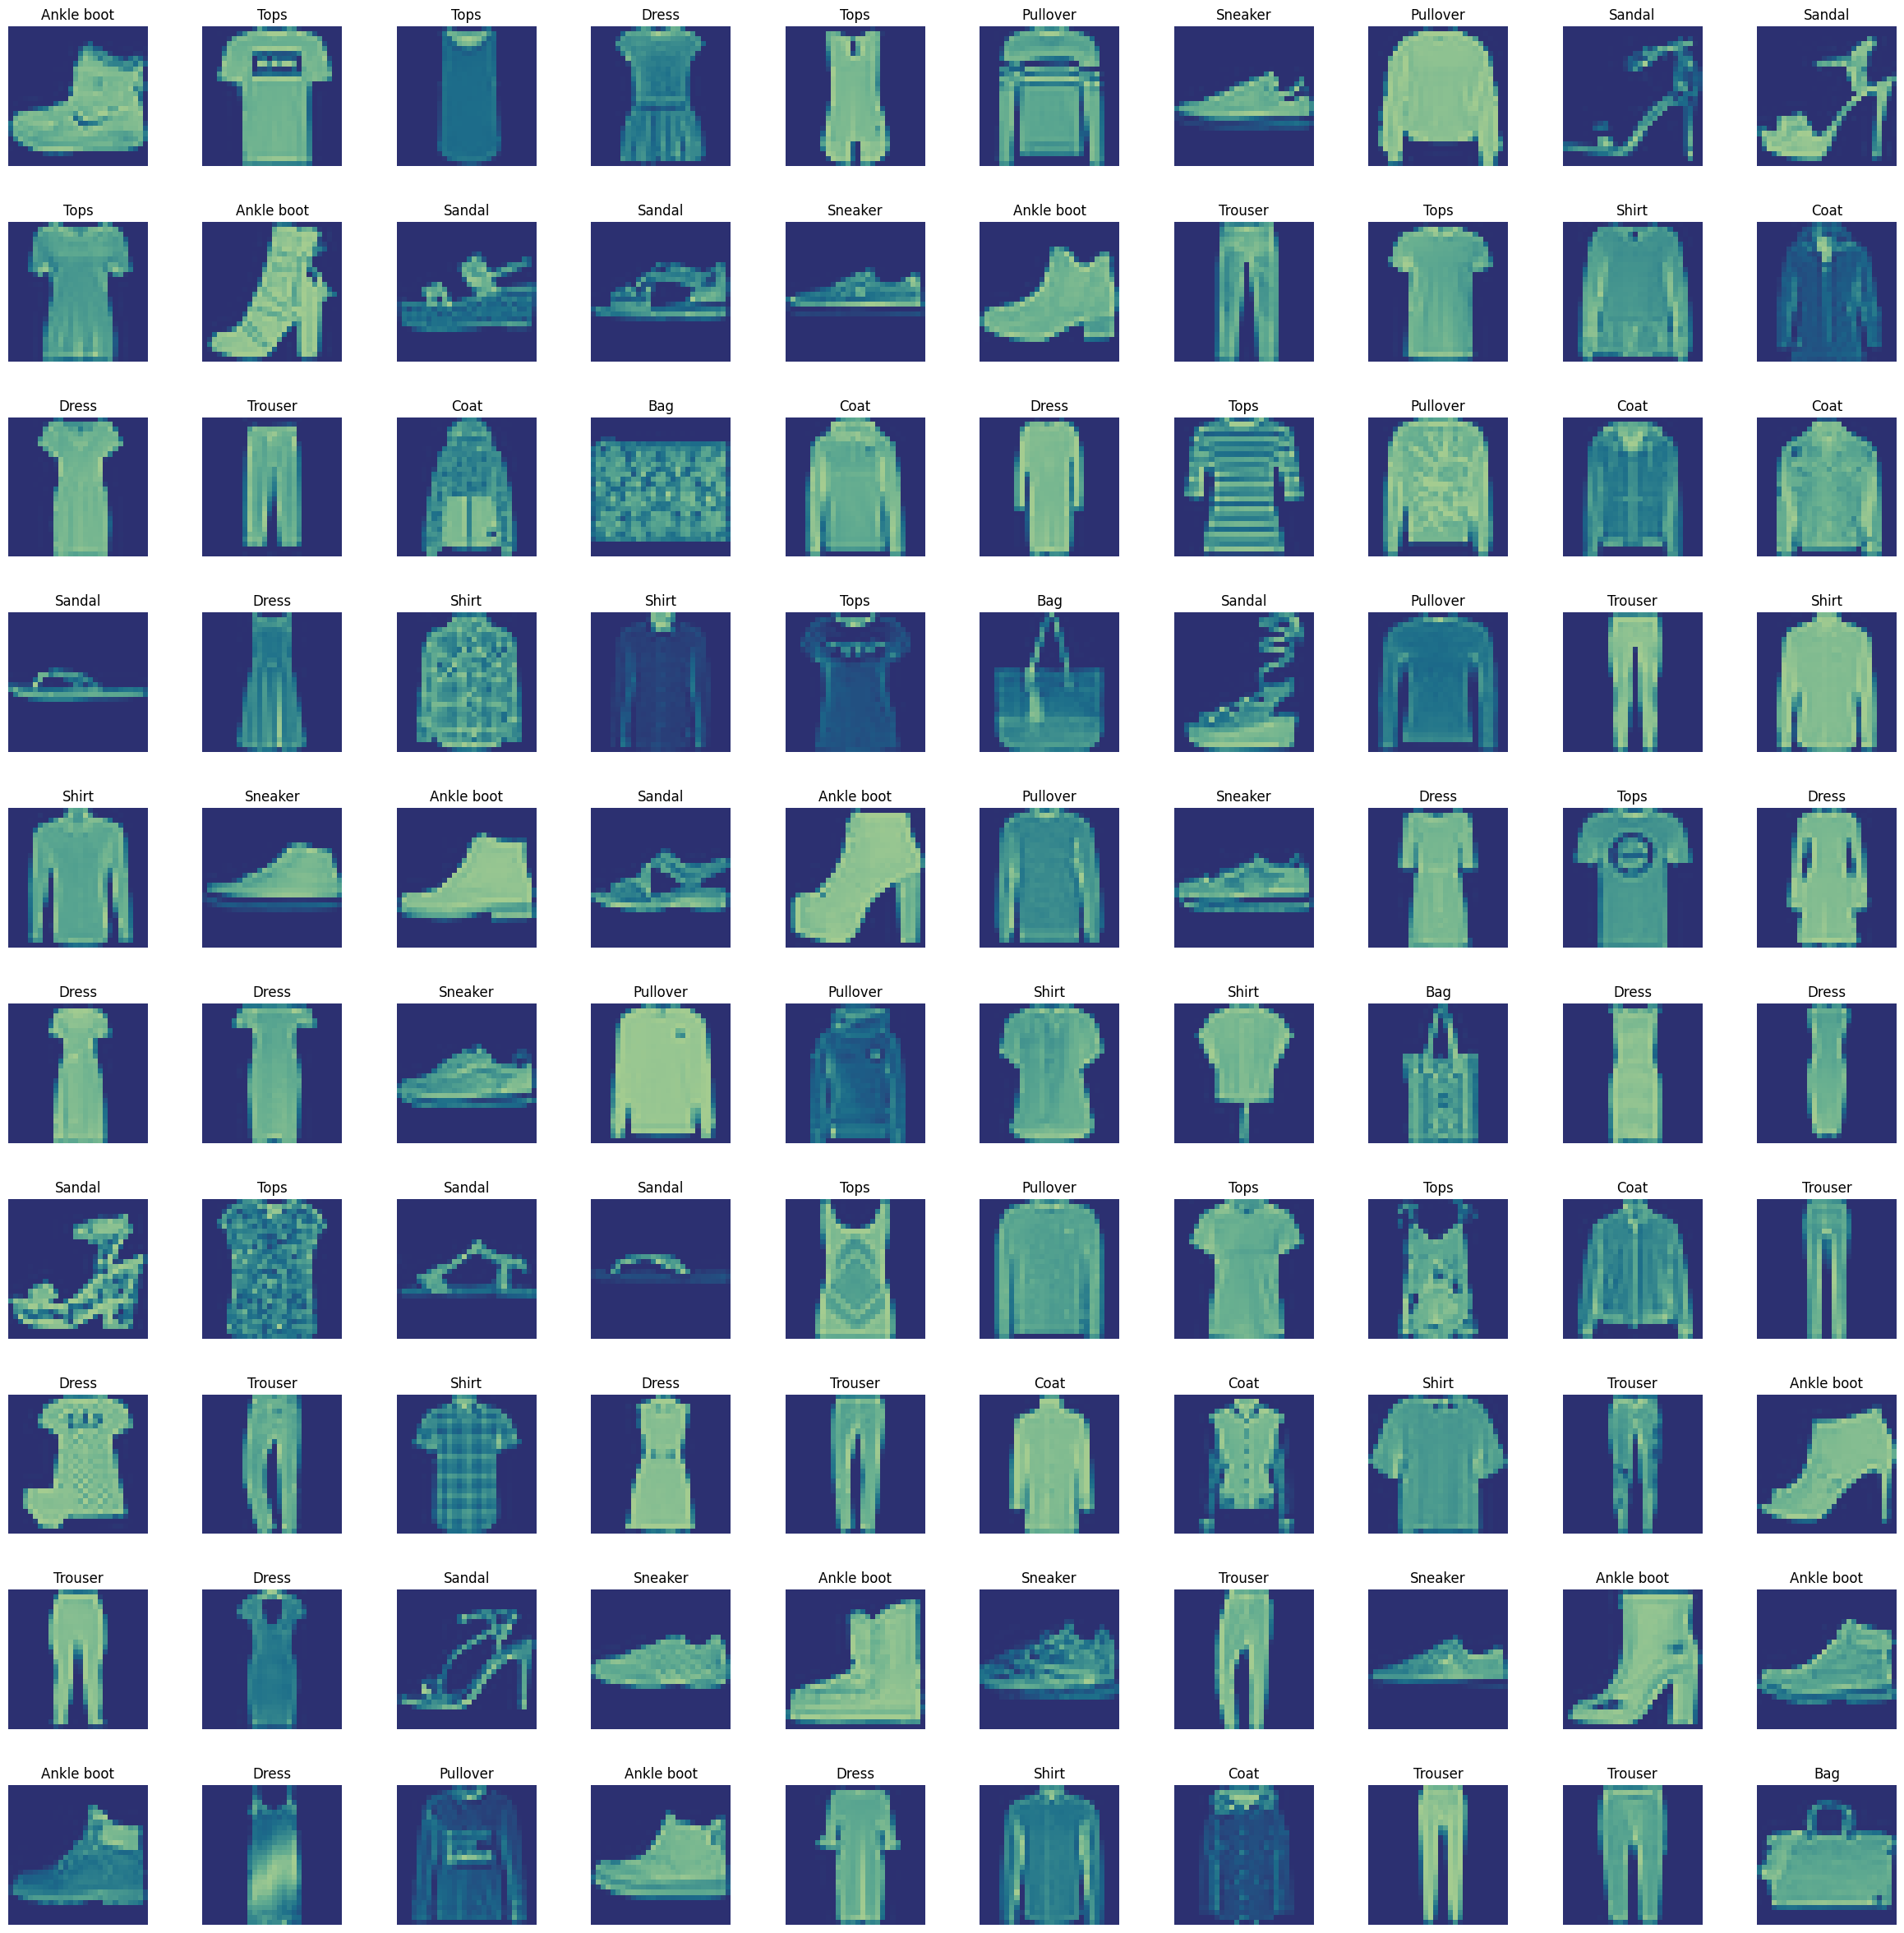

In [5]:
plt.figure(figsize=(30,30)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

labels = ['Tops', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(100):

    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(x_train[i],cmap='crest_r')
    plt.title(labels[int(y_train[i])],fontsize=12)
    plt.axis('off')

plt.show()

Data visualistaion:


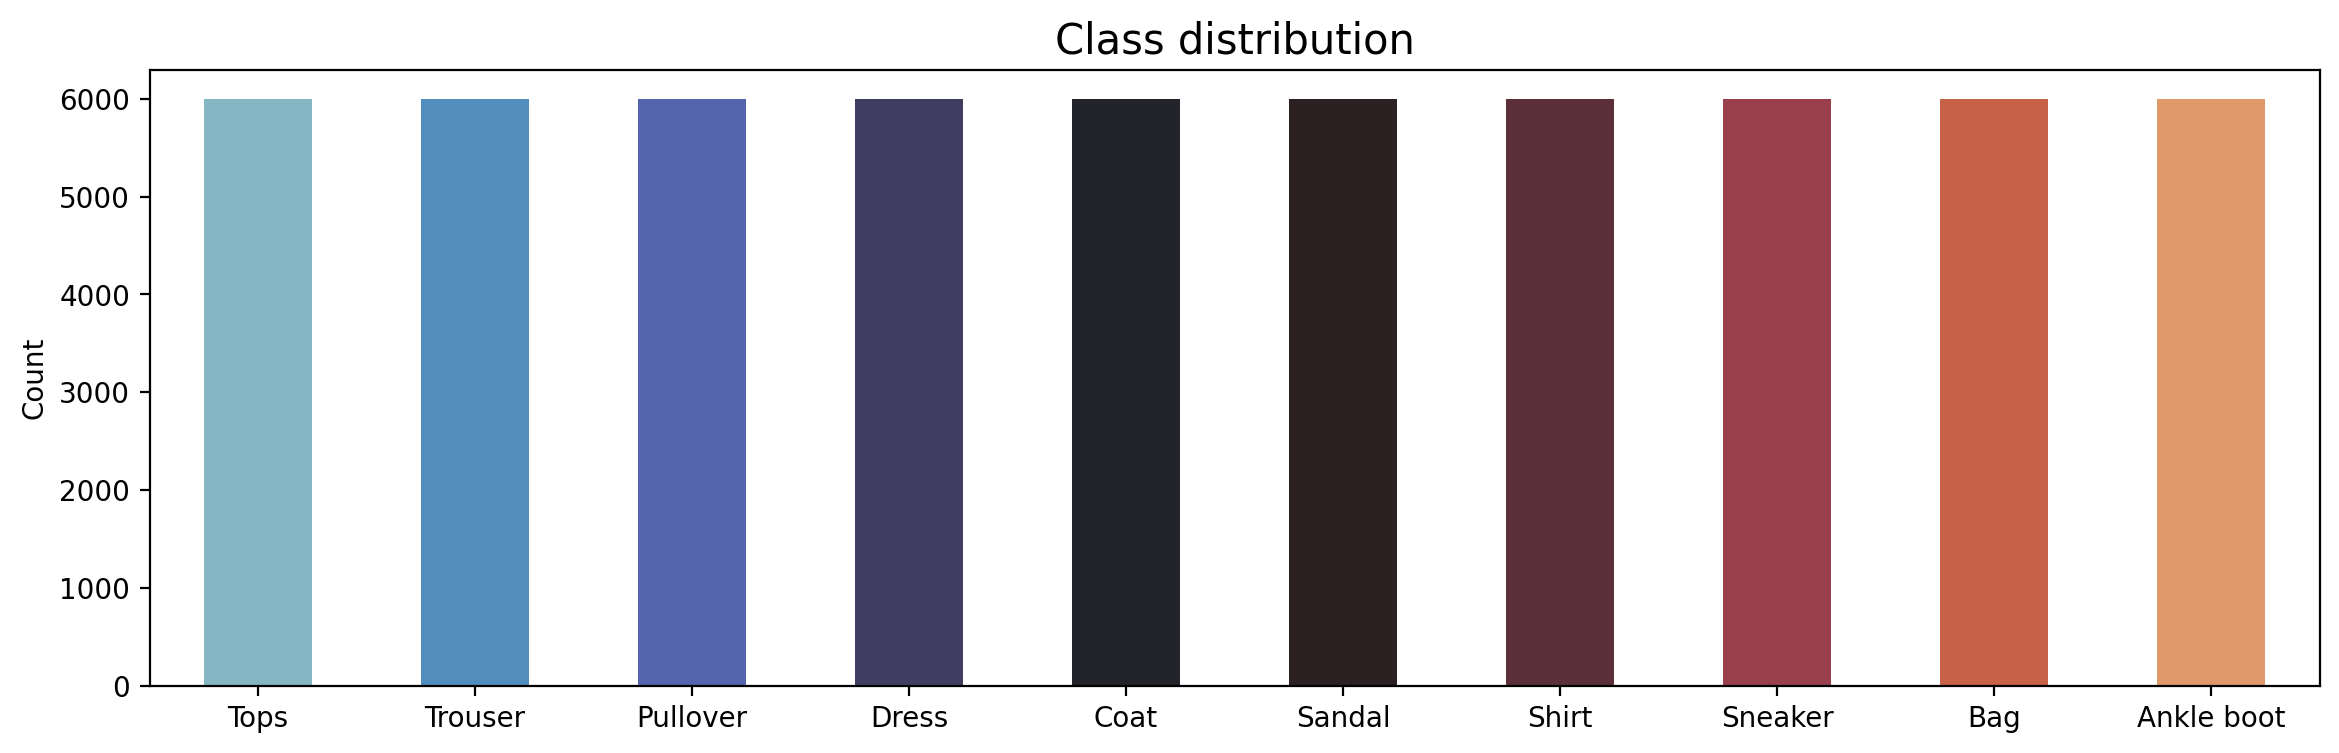

In [7]:
label,count = np.unique(y_train,return_counts=True)
vals= pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=vals,x=vals.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution',fontsize=15)
plt.show()

Data preprocessing:

In [9]:
# normalisation of pixel values to [0,1] range
def pre_process(data):
    return data/255 #255 is max pixel value

#conversion of categorical to vectors
def to_cat(data):
    return to_categorical(data,num_classes=10) #pre-defined func

In [10]:
x_train = pre_process(x_train)
x_test = pre_process(x_test)

print('The shape of y_train before one hot encoding',y_train.shape)

y_train = to_cat(y_train)

print('The shape of y_train after one hot encoding',y_train.shape)

The shape of y_train before one hot encoding (60000,)
The shape of y_train after one hot encoding (60000, 10)


Train-test split:

In [11]:
#0.2 split with seed
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('The number of train data is ',X_train.shape[0])
print('The number of test data is ',X_test.shape[0])

The number of train data is  48000
The number of test data is  12000


Reshaping dataset:
this code prepares the image data for input into a convolutional neural network (CNN) model by reshaping it into the correct format (4D tensors)

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #1 signifies grayscale image
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


Model arhcitecture:

In [15]:
model= models.Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))

# block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

#block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#model.add(MaxPool2D())

# output layers
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# stops training when overfitting occurs
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Training:

In [19]:
fashion = model.fit(X_train,Y_train,
                    validation_data=(X_test,Y_test),
                    epochs=5,
                    callbacks=[early_stopping])

loss3,acc3 = model.evaluate(X_test,Y_test,batch_size = 64, verbose = 0) #verbose: no output display during eval

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2835 - accuracy: 0.8998 - val_loss: 0.2519 - val_accuracy: 0.9080
Epoch 2/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2599 - accuracy: 0.9084 - val_loss: 0.2271 - val_accuracy: 0.9159
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2407 - accuracy: 0.9138 - val_loss: 0.2207 - val_accuracy: 0.9178
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2274 - accuracy: 0.9181 - val_loss: 0.2539 - val_accuracy: 0.9051
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2139 - accuracy: 0.9242 - val_loss: 0.1966 - val_accuracy: 0.9268


Data Augmentation:

In [22]:
datagen = ImageDataGenerator(#rotation_range=50,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                            )


train_gen = datagen.flow(X_train,Y_train, batch_size=32)

fashion = model.fit(train_gen,
                    validation_data=(X_test,Y_test),
                    epochs=10,
                   callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2673 - accuracy: 0.9053 - val_loss: 0.1964 - val_accuracy: 0.9298
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2661 - accuracy: 0.9049 - val_loss: 0.2060 - val_accuracy: 0.9249
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2585 - accuracy: 0.9065 - val_loss: 0.1999 - val_accuracy: 0.9262
Epoch 4/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2558 - accuracy: 0.9086 - val_loss: 0.1904 - val_accuracy: 0.9322
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2504 - accuracy: 0.9107 - val_loss: 0.1969 - val_accuracy: 0.9292
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2443 - accuracy: 0.9140 - val_loss: 0.1945 - val_accuracy: 0.9304
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2423 - accuracy: 0.9152 - val_loss: 0.2134 -

Prediction:

In [23]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [24]:
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

        Tops       0.86      0.90      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.93      0.86      0.90      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.86      0.92      0.89      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.80      0.76      0.78      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      1.00      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

